<a href="https://colab.research.google.com/github/ankitaggarwal64/Agricultural-Equipment-Sales-Forecasting/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Selection**

We will use Boruta feature selection algorithm which is statistically grounded and works extremely well even without any specific input by the user. Two key ideas behind Boruta method.


*   The first idea: shadow features:In this, features do not compete among themselves. Instead they compete with a randomized version of them.
*   The second idea: binomial distribution(the key is iteration)



**Feature Selection considering variables only with no significant missing values(data from 1990)**

In [6]:
#Import libraries
import pandas as pd

In [7]:
#import data without predictors with significant missing values
data = pd.read_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_without_missvalcol.csv",parse_dates=['Time'], index_col='Time')

#Size of data - Sales and Indices
print(data.shape)

# displaying data
display(data)

(324, 35)


,Sales,corn1,corn3,wheat1,wheat2,wheat3,wheat4,hay2,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI,livestock1_broilers_isNA,livestock2_beef_steers_isNA,livestock3_steers_isNA,livestock4_steers_isNA,livestock5_hog_isNA,livestock6_hog_isNA,wheat5_isNA,dairy1_isNA,dairy2_isNA,dairy3_isNA,dairy4_isNA,dairy5_isNA,BRLCS_broilers_isNA,STRTXOK_beef_steers_isNA,Non-ResidentialInvest_isNA
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,239.83,2.31,402.53,396.76,429.99,3.71,93.3,15.5,0.51,79.06,46.26,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-02-28,467,241.59,2.32,392.28,386.30,412.67,3.56,95.2,14.5,0.51,79.04,46.26,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-03-31,467,250.58,2.37,387.13,377.33,403.26,3.48,96.7,13.9,0.51,79.16,46.26,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-04-30,593,273.49,2.51,383.06,367.06,412.49,3.49,103.0,13.4,0.51,79.89,46.26,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-05-31,866,284.34,2.62,371.44,365.44,389.52,3.40,104.0,13.5,0.51,78.28,46.26,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,323.04,3.21,398.89,407.10,414.74,3.67,138.0,17.2,0.80,116.55,65.86,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-30,200,328.90,3.22,375.02,390.98,424.61,3.49,137.0,17.4,0.78,106.08,65.86,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-31,611,349.49,3.29,381.28,408.77,440.15,3.68,135.0,16.7,0.71,100.37,65.86,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# data without _isNA columns in data
data = data.iloc[:,0:20]
display(data)

,Sales,corn1,corn3,wheat1,wheat2,wheat3,wheat4,hay2,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,239.83,2.31,402.53,396.76,429.99,3.71,93.3,15.5,0.51,79.06,46.26,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,241.59,2.32,392.28,386.30,412.67,3.56,95.2,14.5,0.51,79.04,46.26,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,250.58,2.37,387.13,377.33,403.26,3.48,96.7,13.9,0.51,79.16,46.26,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,273.49,2.51,383.06,367.06,412.49,3.49,103.0,13.4,0.51,79.89,46.26,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,284.34,2.62,371.44,365.44,389.52,3.40,104.0,13.5,0.51,78.28,46.26,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,323.04,3.21,398.89,407.10,414.74,3.67,138.0,17.2,0.80,116.55,65.86,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8
2016-09-30,200,328.90,3.22,375.02,390.98,424.61,3.49,137.0,17.4,0.78,106.08,65.86,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5
2016-10-31,611,349.49,3.29,381.28,408.77,440.15,3.68,135.0,16.7,0.71,100.37,65.86,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8


In [9]:
!pip install boruta

     |████████████████████████████████| 61kB 6.1MB/s 


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = data.iloc[:,1:20]
y = data.iloc[:,0]

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_jobs=-1,max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto',max_iter = 100, random_state=1)

# find all relevant features
feat_selector.fit(np.array(X),np.array(y))

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=5,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=63, n_jobs=-1,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F9CC846EEB8,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_stat

In [11]:
# print results
green_area = X.columns[feat_selector.support_].to_list()
blue_area = X.columns[feat_selector.support_weak_].to_list()
print('features to keep(confirmed):', green_area)
print('features to keep(tentatively):', blue_area)

features to keep(confirmed): ['corn1', 'hay2', 'ConstructionEm']
features to keep(tentatively): ['wheat4', 'HOUST']


In [12]:
# Save selected features along with Sales data
data_boruta_select = data[['Sales']+ green_area + blue_area]
data_boruta_select.to_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_boruta_select.csv")

print(data_boruta_select.head())

            Sales   corn1   hay2  ConstructionEm  wheat4   HOUST
Time                                                            
1990-01-31    505  239.83   93.3            5.42    3.71  1551.0
1990-02-28    467  241.59   95.2            5.42    3.56  1437.0
1990-03-31    467  250.58   96.7            5.39    3.48  1289.0
1990-04-30    593  273.49  103.0            5.36    3.49  1248.0
1990-05-31    866  284.34  104.0            5.32    3.40  1212.0


**Feature Selection considering all variables(with data from 1999)**

In [41]:
#import data without predictors with significant missing values
data_after_1999 = pd.read_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_from_1999.csv",parse_dates=['Time'], index_col='Time')

#Size of data - Sales and Indices
print(data_after_1999.shape)

# displaying data
display(data_after_1999)

(216, 43)


,Sales,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn3,wheat1,wheat2,wheat3,wheat4,hay2,dairy1,dairy2,dairy3,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI,livestock1_broilers_isNA,livestock2_beef_steers_isNA,livestock3_steers_isNA,livestock4_steers_isNA,livestock5_hog_isNA,livestock6_hog_isNA,wheat5_isNA,dairy1_isNA,dairy2_isNA,dairy3_isNA,dairy4_isNA,dairy5_isNA,BRLCS_broilers_isNA,STRTXOK_beef_steers_isNA,Non-ResidentialInvest_isNA
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-31,335,75.60,16.62,14.55,216.71,2.06,246.32,276.88,326.29,2.84,81.4,0.22,1.07,17.14,13.12,17.4,0.59,61.38,47.72,1459.0,1748.0,11864.7,4.3,7.75,1.65,6.79,6.36,128.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1999-02-28,308,79.14,28.58,15.43,214.38,2.05,227.46,258.16,304.57,2.73,83.7,0.19,1.04,17.64,12.78,15.2,0.58,63.00,47.72,1459.0,1670.0,11864.7,4.4,7.75,1.65,6.81,6.43,133.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1999-03-31,395,81.14,28.25,18.41,219.86,2.06,235.65,268.10,303.12,2.65,83.2,0.19,1.02,16.57,12.36,15.2,0.57,64.83,47.72,1459.0,1710.0,11864.7,4.2,7.75,1.65,7.04,6.40,134.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1999-04-30,571,82.73,31.69,19.49,217.95,2.04,231.43,261.15,294.25,2.62,86.4,0.19,1.01,10.57,11.06,12.6,0.55,65.20,47.72,1497.3,1553.0,11962.5,4.3,7.75,1.66,6.92,6.48,135.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1999-05-31,367,81.08,38.45,25.28,217.89,1.99,224.46,254.01,288.89,2.49,91.0,0.17,1.01,11.92,11.62,12.8,0.60,65.00,47.72,1497.3,1611.0,11962.5,4.2,7.75,1.66,7.15,6.52,137.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,151.20,48.12,47.38,323.04,3.21,398.89,407.10,414.74,3.67,138.0,0.28,0.86,15.21,14.65,17.2,0.80,116.55,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-30,200,138.38,43.36,42.83,328.90,3.22,375.02,390.98,424.61,3.49,137.0,0.30,0.88,14.66,14.25,17.4,0.78,106.08,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-31,611,121.82,37.07,30.84,349.49,3.29,381.28,408.77,440.15,3.68,135.0,0.33,0.92,14.09,13.66,16.7,0.71,100.37,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# data without _isNA columns in data
data_after_1999 = data_after_1999.iloc[:,0:28]
display(data_after_1999)

,Sales,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn3,wheat1,wheat2,wheat3,wheat4,hay2,dairy1,dairy2,dairy3,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-31,335,75.60,16.62,14.55,216.71,2.06,246.32,276.88,326.29,2.84,81.4,0.22,1.07,17.14,13.12,17.4,0.59,61.38,47.72,1459.0,1748.0,11864.7,4.3,7.75,1.65,6.79,6.36,128.9
1999-02-28,308,79.14,28.58,15.43,214.38,2.05,227.46,258.16,304.57,2.73,83.7,0.19,1.04,17.64,12.78,15.2,0.58,63.00,47.72,1459.0,1670.0,11864.7,4.4,7.75,1.65,6.81,6.43,133.1
1999-03-31,395,81.14,28.25,18.41,219.86,2.06,235.65,268.10,303.12,2.65,83.2,0.19,1.02,16.57,12.36,15.2,0.57,64.83,47.72,1459.0,1710.0,11864.7,4.2,7.75,1.65,7.04,6.40,134.0
1999-04-30,571,82.73,31.69,19.49,217.95,2.04,231.43,261.15,294.25,2.62,86.4,0.19,1.01,10.57,11.06,12.6,0.55,65.20,47.72,1497.3,1553.0,11962.5,4.3,7.75,1.66,6.92,6.48,135.5
1999-05-31,367,81.08,38.45,25.28,217.89,1.99,224.46,254.01,288.89,2.49,91.0,0.17,1.01,11.92,11.62,12.8,0.60,65.00,47.72,1497.3,1611.0,11962.5,4.2,7.75,1.66,7.15,6.52,137.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,151.20,48.12,47.38,323.04,3.21,398.89,407.10,414.74,3.67,138.0,0.28,0.86,15.21,14.65,17.2,0.80,116.55,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8
2016-09-30,200,138.38,43.36,42.83,328.90,3.22,375.02,390.98,424.61,3.49,137.0,0.30,0.88,14.66,14.25,17.4,0.78,106.08,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5
2016-10-31,611,121.82,37.07,30.84,349.49,3.29,381.28,408.77,440.15,3.68,135.0,0.33,0.92,14.09,13.66,16.7,0.71,100.37,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8


In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = data_after_1999.iloc[:,1:]
y = data_after_1999.iloc[:,0]

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_jobs=-1,max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto',max_iter = 100, random_state=1)

# find all relevant features
feat_selector.fit(np.array(X),np.array(y))

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=5,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=63, n_jobs=-1,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7FA45314ACA8,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_stat

In [46]:
# print results
green_area = X.columns[feat_selector.support_].to_list()
blue_area = X.columns[feat_selector.support_weak_].to_list()
print('features to keep(confirmed):', green_area)
print('features to keep(tentatively):', blue_area)

#Observation : All the three varaibles selected here were alreadt in feature selection with limited variable above(data from 1990)( as wheat2 is highly correlated to wheat4)

features to keep(confirmed): ['HOUST', 'ConstructionEm']
features to keep(tentatively): ['wheat3']


**Based on above feature selection analysis, we will consider all 5 variables (corn1,    hay2, ConstructionEm, wheat4, HOUST) for further modelling**

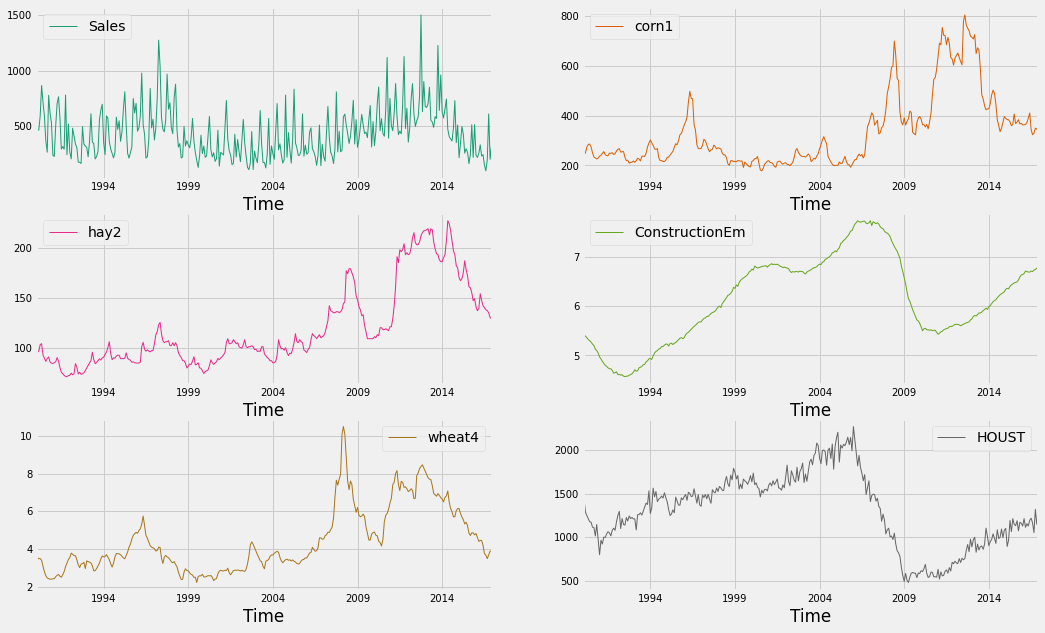

In [14]:
# Ploting Sales along with selected features
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
ax = data_boruta_select.plot(subplots= True,linewidth=1,layout =(3,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(16,10),fontsize=10)
plt.show()

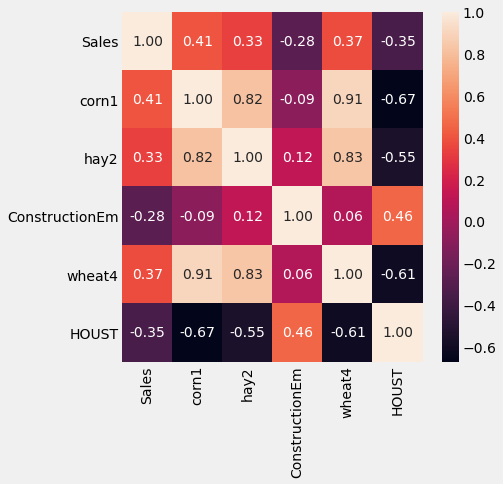

In [17]:
# Plotting correlation heat map
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,6))  
sns.heatmap(data_boruta_select.corr(),annot=True,fmt =".2f")

# corn1, hay2 and wheat4 are highly correlated. Further, we can explore VIF analysis to explore multicolinearity

In [18]:
# Calculating VIF values
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Sales ~ corn1+hay2+ConstructionEm+wheat4+HOUST', data=data_boruta_select, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
print(vif)

#Observation : All VIF values are less than 10, therefore all are considerable. We can check VIF values after removing one among corn1 and wheat4

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,variable
0,67.399121,Intercept
1,7.336780,corn1
2,3.852161,hay2
3,1.874270,ConstructionEm
4,7.234296,wheat4
5,2.820190,HOUST


In [19]:
# Calculating VIF values after removing corn1
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Sales ~ hay2+ConstructionEm+wheat4+HOUST', data=data_boruta_select, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

#Observation : Removing corn1 from variables, helps VIF values to come below 5 which signifies only moderate correlation and good for modelling.

,VIF,variable
0,60.234673,Intercept
1,3.482158,hay2
2,1.756872,ConstructionEm
3,3.812773,wheat4
4,2.781058,HOUST


**Conclusion** : We will consider all five variables corn1, hay2, ConstructionEm, wheat4, HOUST for further modelling. We can explore removing corn1 as this might improve model performance because of removal of collinearity.

References:


1.   https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a
2.   https://github.com/scikit-learn-contrib/boruta_py

